# Analysis 1 

First program to predict the GDP growth.

We load the data from a sqlite3 data set and predicted the GDP growth value with a Linear Regression model.

We didn't understand the problem, so this model predicted the GDP growth for the same year

In [1]:
import sys
sys.path.append("..") #To import from the utils package

import utils
from utils import config

import pandas as pd
import sqlite3
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

We thought it was easier to see the county and indicator names, instead of codes, so we do 2 left joins with sql

All the indicators come from config

In [2]:
#Load data from the dataset

conn = sqlite3.connect('../db.sqlite3')

indicators = config.INDICATORS
separator = "',\n'"
sql_string = f""" SELECT
                t2.Country,
                t1.Year,
                t3.IndicatorName,
                t1.Value                
                FROM CountryIndicators t1
                LEFT JOIN
                (SELECT ShortName as Country, CountryCode from Countries) t2
                ON t1.CountryCode = t2.CountryCode
                LEFT JOIN
                (SELECT IndicatorCode, IndicatorName from Indicators)t3
                ON t1.IndicatorCode = t3.IndicatorCode
                WHERE t3.IndicatorName in ('{"','".join(indicators)}');"""

df = pd.read_sql(sql_string,conn)
df = df.groupby(["Country","Year","IndicatorName"]).sum().squeeze().unstack()
df = df.reset_index(level=["Country","Year"])


# Rows where our target is not missing
gdp = config.GDP_GROWTH
df = df[df[gdp].notna()]
df = df.dropna(axis='columns',thresh=6000)
df = df.dropna()
df

IndicatorName,Country,Year,Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (% of GNI),"Agriculture, value added (annual % growth)",CO2 emissions (kt),Crop production index (2004-2006 = 100),"Death rate, crude (per 1,000 people)",Exports of goods and services (annual % growth),External balance on goods and services (% of GDP),...,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Livestock production index (2004-2006 = 100),Merchandise trade (% of GDP),Mobile cellular subscriptions,Mobile cellular subscriptions (per 100 people),Population growth (annual %),"Services, etc., value added (annual % growth)",Total reserves minus gold (current US$),Urban population growth (annual %)
88,Albania,1997,633.314076,2.832103,-17.110130,1543.807,82.78,5.962,-25.681736,-24.444341,...,75.960,69.982,78.85,33.271705,3300.0,0.099060,-0.625430,-14.666283,3.089274e+08,0.788237
89,Albania,1998,789.879492,2.842804,6.240056,1752.826,88.78,5.886,23.800860,-23.792735,...,76.410,70.390,80.02,38.768083,5600.0,0.168398,-0.629334,1.261038,3.842209e+08,0.774515
90,Albania,1999,991.641517,2.842804,5.395946,2984.938,81.91,5.802,73.055409,-16.396286,...,76.906,70.829,84.47,44.085370,11008.0,0.331772,-0.633352,14.921248,4.882995e+08,0.755984
91,Albania,2000,1080.443350,2.842804,6.687782,3021.608,85.55,5.727,23.629106,-20.186261,...,77.419,71.275,89.14,37.112161,29791.0,0.901406,-0.637357,4.438373,6.156475e+08,0.742479
92,Albania,2001,1216.132154,2.842804,2.694806,3223.293,88.51,5.677,1.247275,-20.567219,...,77.917,71.703,91.29,40.241494,392650.0,11.948873,-0.938470,9.442771,7.399030e+08,0.710443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,Zambia,1989,335.391026,2.400000,-2.682257,2603.570,76.66,18.227,-1.406671,-7.019601,...,47.235,43.113,62.40,56.400109,0.0,0.000000,2.881119,-8.897138,1.162263e+08,2.754495
12443,Zambia,1990,280.053219,2.600000,-8.904595,2445.889,60.63,18.659,-7.240211,-0.705576,...,46.330,42.391,78.32,76.907128,0.0,0.000000,2.765511,-7.240226,1.931285e+08,2.641239
12444,Zambia,1991,281.992897,2.800000,5.171966,2416.553,64.08,19.025,4.568420,-2.638588,...,45.500,41.795,81.83,56.296044,0.0,0.000000,2.644750,5.544432,1.846286e+08,1.578363
12446,Zambia,1993,289.752818,2.000000,68.111740,2500.894,76.44,19.527,3.453392,-6.830206,...,44.145,40.998,81.89,49.946422,0.0,0.000000,2.499392,7.250019,1.923261e+08,1.266295


In [5]:
#Filter one contry on the data set
country_list = df.Country.unique() #Array with all column names
country = df.loc[df["Country"] == "United Kingdom"]
country.head()

IndicatorName,Country,Year,Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (% of GNI),"Agriculture, value added (annual % growth)",CO2 emissions (kt),Crop production index (2004-2006 = 100),"Death rate, crude (per 1,000 people)",Exports of goods and services (annual % growth),External balance on goods and services (% of GDP),...,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Livestock production index (2004-2006 = 100),Merchandise trade (% of GDP),Mobile cellular subscriptions,Mobile cellular subscriptions (per 100 people),Population growth (annual %),"Services, etc., value added (annual % growth)",Total reserves minus gold (current US$),Urban population growth (annual %)
11845,United Kingdom,1991,15538.149468,4.3,4.232448,566804.523,105.11,11.3,0.165924,-0.321173,...,78.9,73.4,108.84,34.556526,1260000.0,2.196367,0.309248,0.802486,4.189198e+10,0.273409
11846,United Kingdom,1992,16305.162848,4.5,4.071329,556192.225,110.39,11.0,4.529827,-0.650429,...,79.2,73.8,108.09,34.887524,1507000.0,2.619946,0.270431,1.124332,3.664102e+10,0.347214
11847,United Kingdom,1993,14673.403917,5.2,-7.607349,545561.592,103.81,11.4,4.550800,-0.301669,...,79.1,73.8,107.15,36.810171,2268000.0,3.932425,0.239745,3.512000,3.677667e+10,0.316469
11848,United Kingdom,1994,16119.092094,5.2,-0.793208,546606.687,98.94,10.8,9.229266,0.032850,...,79.6,74.3,110.48,38.505826,3940000.0,6.812778,0.254586,3.735524,4.101267e+10,0.332530
11849,United Kingdom,1995,17598.998400,5.1,-1.644143,537970.902,98.04,11.1,9.192743,0.336885,...,79.5,74.3,111.24,40.822442,5735785.0,9.889762,0.264547,6.337059,4.201562e+10,0.341154


We drop the column we wanted to predict for X and assigned it to y

In [6]:
#dataset = country #Info for one contry
dataset = df #Info for all contries

""" We first split the training and test
    make a copy of the test data in order to display de Country and Year
    and then drop these fields
    We are not taking into account the temporal nature of the data
"""
# X = dataset[features]
X = dataset.drop(columns=gdp)
y = dataset[gdp]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train.drop(columns=["Country","Year"])
X_test2 = X_test
X_test = X_test.drop(columns=["Country","Year"])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(type(X))
print(type(y))

X_train shape: (1864, 31)
X_test shape: (799, 31)
y_train shape: (1864,)
y_test shape: (799,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


And the predictions where pretty good

In [7]:
features = df.columns.tolist()
features.remove(gdp)
features.remove("Country")
features.remove("Year")

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

results_df = X_test2
results_df = results_df.drop(columns=features)
results_df["y_real"] = y_test
results_df["y_pred"] = linear_y_pred
results_df["err"] = np.absolute(results_df["y_real"] - results_df["y_pred"])
results_df["%_err"] = ((results_df["err"]) /(np.absolute (results_df["y_real"]))* 100)

print(f"RMSE: {mean_squared_error(y_test, linear_y_pred)**0.5}")
print(f"R^2: {r2_score(y_test, linear_y_pred)}")

results_df

RMSE: 0.12142652706006382
R^2: 0.999251298103067


IndicatorName,Country,Year,y_real,y_pred,err,%_err
7219,Mauritania,1988,1.720398,1.761047,0.040649,2.362745
1313,Botswana,1998,0.721993,0.732614,0.010621,1.471087
2702,Côte d'Ivoire,2010,2.017639,2.041254,0.023615,1.170439
8449,Norway,1994,5.055454,5.130939,0.075485,1.493143
7840,Mozambique,1997,10.842032,10.788119,0.053913,0.497260
...,...,...,...,...,...,...
5608,Jordan,2009,5.476581,5.480643,0.004062,0.074166
3415,Estonia,2009,-14.724402,-15.064171,0.339769,2.307520
1011,Belize,2002,5.118559,5.133714,0.015155,0.296077
1677,Cambodia,2005,13.250086,13.240683,0.009403,0.070964


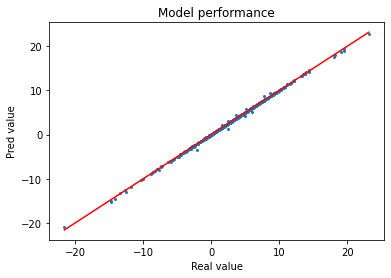

In [8]:
#Predicted Value Plot

fig, ax = plt.subplots()
plot_range = [results_df["y_real"].min(), results_df["y_real"].max()] 
ax.set_title("Model performance")
ax.set_ylabel("Pred value")
ax.set_xlabel("Real value")
ax.scatter(results_df["y_real"], results_df["y_pred"], s=4)
ax.plot(plot_range, plot_range, c="red")
plt.show()

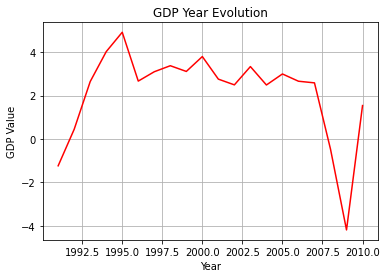

In [9]:
#Filer data by countries using panda
country_list = df.Country.unique()
country = df.loc[df["Country"] == "United Kingdom"]
country.head()

# Time evolution GDP growth of One Country
year = country["Year"]
gdp = country["GDP growth (annual %)"]

fig, ax = plt.subplots()
ax.set_title("GDP Year Evolution")
ax.set_ylabel("GDP Value")
ax.set_xlabel("Year")
ax.grid()
ax.plot(year, gdp, c="red")
plt.show()